In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:

dataset_path = 'movies.csv'

df = pd.read_csv(dataset_path)

df.describe()


,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


# DATA CLEANING AND PRE PROCESSING

In [4]:
# Number of rows and columns in the original raw dataset

num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 9999
Number of columns: 9


In [5]:
# Dataset cleanning method - 1
# Removing duplicate values

df = df.drop_duplicates()

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [6]:
# Number of rows and columns after dropping duplicate values
num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 9568
Number of columns: 9


In [7]:
column_data_types = df.dtypes

# Display the data type of each column
print("Data type of each column:")
print(column_data_types)

Data type of each column:
MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object


In [8]:
num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 9568
Number of columns: 9


In [9]:
# DATA CLEANNIG PROCESS - 2
# CONVERTING ALL THE VARIOUS TYPES OF DATA INTO A SINGLE TYPE

df['VOTES'] = df['VOTES'].str.replace(',', '').astype(float)

In [10]:
column_data_types = df.dtypes

# Display the data type of each column
print("Data type of each column:")
print(column_data_types)

Data type of each column:
MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES       float64
RunTime     float64
Gross        object
dtype: object


In [11]:
 # Data cleaning process - 3
# removing null values

# We find the number of columns with the common null values and remove them to not skew the data instead of filling it up all three values
# with some filler.

nan_counts = df.isna().sum()


print("Number of NaN values per column:")
print(nan_counts)

Number of NaN values per column:
MOVIES         0
YEAR         542
GENRE         78
RATING      1400
ONE-LINE       0
STARS          0
VOTES       1400
RunTime     2560
Gross       9108
dtype: int64


In [12]:
columns_with_missing = ['RATING', 'VOTES', 'RunTime']
# 'YEAR', 'GENRE',

# Filtering the rows with missing values for any of the specified columns
rows_to_drop = df[df[columns_with_missing].isnull().all(axis=1)]


num_rows_missing = len(rows_to_drop)
print(f"Number of rows with missing values for specified columns: {num_rows_missing}")

Number of rows with missing values for specified columns: 1178


In [13]:
df = df.drop(rows_to_drop.index)

num_rows_missing = len(rows_to_drop)

In [14]:
nan_counts = df.isna().sum()


print("Number of NaN values per column:")
print(nan_counts)

Number of NaN values per column:
MOVIES         0
YEAR          21
GENRE         13
RATING       222
ONE-LINE       0
STARS          0
VOTES        222
RunTime     1382
Gross       7930
dtype: int64


In [15]:
num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 8390
Number of columns: 9


In [16]:
 # Data cleaning process - 4
# Filling in the data with other measures

# if we wanted to drop the rows with null values we are losing the majority of the rows so we are filling the
# null values with the median value of the entire column

df = df.dropna(subset=['GENRE'])

df['RATING'].fillna(df['RATING'].median(), inplace=True)
df['VOTES'].fillna(df['VOTES'].mean(), inplace=True)
df['RunTime'].fillna(df['RunTime'].median(), inplace=True)

df.head()

<ipython-input-16-e1358c782600>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RATING'].fillna(df['RATING'].median(), inplace=True)
<ipython-input-16-e1358c782600>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VOTES'].fillna(df['VOTES'].mean(), inplace=True)
<ipython-input-16-e1358c782600>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RunTime'].fillna(df['RunTime'].median(), inplace=True)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,21062.0,121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",17870.0,25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",414849.0,23.0,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...",25858.0,50.0,NaN


In [17]:
# Data cleaning method - 5
# Setting all the numeric characters to the same precision to avoid inconsistency

desired_precision = 2

pd.set_option('display.float_format', lambda x: f'{x:.{desired_precision}f}')

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.10,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,21062.00,121.00,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.00,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",17870.00,25.00,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.20,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.00,44.00,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.20,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",414849.00,23.00,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.60,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...",25858.00,50.00,NaN


In [18]:
# Data cleaning method - 6

# Converting all text data into lowercase data.

df['MOVIES'] = df['MOVIES'].str.lower()
df['GENRE'] = df['GENRE'].str.lower()
df['ONE-LINE'] = df['ONE-LINE'].str.lower()
df['STARS'] = df['STARS'].str.lower()

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,blood red sky,(2021),"\naction, horror, thriller",6.10,\na woman with a mysterious illness is forced ...,\n director:\npeter thorwarth\n| \n star...,21062.00,121.00,NaN
1,masters of the universe: revelation,(2021– ),"\nanimation, action, adventure",5.00,\nthe war for eternia begins again in what may...,"\n \n stars:\nchris wood, \nsara...",17870.00,25.00,NaN
2,the walking dead,(2010–2022),"\ndrama, horror, thriller",8.20,\nsheriff deputy rick grimes wakes up from a c...,"\n \n stars:\nandrew lincoln, \n...",885805.00,44.00,NaN
3,rick and morty,(2013– ),"\nanimation, adventure, comedy",9.20,\nan animated series that follows the exploits...,"\n \n stars:\njustin roiland, \n...",414849.00,23.00,NaN
5,outer banks,(2020– ),"\naction, crime, drama",7.60,\na group of teenagers from the wrong side of ...,"\n \n stars:\nchase stokes, \nma...",25858.00,50.00,NaN


In [19]:
num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 8377
Number of columns: 9


In [21]:
#Data cleaning method -7
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate quantiles and IQR for numeric columns only
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers based on IQR for numeric columns
df = df[~((df[numeric_cols] < (Q1 - 3 * IQR)) | (df[numeric_cols] > (Q3 + 3 * IQR))).any(axis=1)]
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6,the last letter from your lover,(2021),"\ndrama, romance",6.80,\na pair of interwoven stories set in the past...,\n director:\naugustine frizzell\n| \n s...,5283.00,110.00,NaN
13,sex/life,(2021– ),"\ncomedy, drama, romance",5.40,\na suburban mother of two takes a fantasy-cha...,"\n \n stars:\nsarah shahi, \nmik...",12172.00,60.00,NaN
25,chernobyl,(2021),"\ndrama, history, romance",5.00,\na story about a heroic fireman who worked as...,\n director:\ndanila kozlovskiy\n| \n st...,4681.00,136.00,NaN
63,le dernier mercenaire,(2021),"\naction, comedy",5.40,\na mysterious former secret service agent mus...,\n director:\ndavid charhon\n| \n stars:...,2606.00,110.00,NaN
64,resort to love,(2021),"\ncomedy, romance",5.70,"\nerica, who ends up as the entertainment at h...",\n director:\nsteven k. tsuchida\n| \n s...,1591.00,101.00,NaN


In [22]:
# Number of rows and columns left after removing outliers using the inter quartile range

num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 7403
Number of columns: 9


In [23]:
# data cleaning process - 8
# Removing the trailing whitespaces in the text data to avoid and inconsistencies.

df['MOVIES'] = df['MOVIES'].str.strip()
df['GENRE'] = df['GENRE'].str.strip()
df['ONE-LINE'] = df['ONE-LINE'].str.strip()
df['STARS'] = df['STARS'].str.strip()

df.head()

<ipython-input-23-3313174d3279>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MOVIES'] = df['MOVIES'].str.strip()
<ipython-input-23-3313174d3279>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENRE'] = df['GENRE'].str.strip()
<ipython-input-23-3313174d3279>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6,the last letter from your lover,(2021),"drama, romance",6.80,a pair of interwoven stories set in the past a...,director:\naugustine frizzell\n| \n stars:\...,5283.00,110.00,NaN
13,sex/life,(2021– ),"comedy, drama, romance",5.40,a suburban mother of two takes a fantasy-charg...,"stars:\nsarah shahi, \nmike vogel, \nadam demo...",12172.00,60.00,NaN
25,chernobyl,(2021),"drama, history, romance",5.00,a story about a heroic fireman who worked as o...,director:\ndanila kozlovskiy\n| \n stars:\n...,4681.00,136.00,NaN
63,le dernier mercenaire,(2021),"action, comedy",5.40,a mysterious former secret service agent must ...,director:\ndavid charhon\n| \n stars:\njean...,2606.00,110.00,NaN
64,resort to love,(2021),"comedy, romance",5.70,"erica, who ends up as the entertainment at her...",director:\nsteven k. tsuchida\n| \n stars:\...,1591.00,101.00,NaN


In [24]:
# Data cleaning and pre processing - 9
# removing the punctuation and special charaters

import re

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

df['MOVIES'] = df['MOVIES'].apply(remove_special_characters)
df['GENRE'] = df['GENRE'].apply(remove_special_characters)
df['ONE-LINE'] = df['ONE-LINE'].apply(remove_special_characters)
df['STARS'] = df['STARS'].apply(remove_special_characters)

df.head()

<ipython-input-24-e3e127e4063b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MOVIES'] = df['MOVIES'].apply(remove_special_characters)
<ipython-input-24-e3e127e4063b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENRE'] = df['GENRE'].apply(remove_special_characters)
<ipython-input-24-e3e127e4063b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6,the last letter from your lover,(2021),drama romance,6.80,a pair of interwoven stories set in the past a...,director\naugustine frizzell\n \n stars\nsh...,5283.00,110.00,NaN
13,sexlife,(2021– ),comedy drama romance,5.40,a suburban mother of two takes a fantasycharge...,stars\nsarah shahi \nmike vogel \nadam demos \...,12172.00,60.00,NaN
25,chernobyl,(2021),drama history romance,5.00,a story about a heroic fireman who worked as o...,director\ndanila kozlovskiy\n \n stars\ndan...,4681.00,136.00,NaN
63,le dernier mercenaire,(2021),action comedy,5.40,a mysterious former secret service agent must ...,director\ndavid charhon\n \n stars\njeancla...,2606.00,110.00,NaN
64,resort to love,(2021),comedy romance,5.70,erica who ends up as the entertainment at her ...,director\nsteven k tsuchida\n \n stars\nchr...,1591.00,101.00,NaN


In [25]:
# Data cleaning process - 10
# Removing numbers from our text data columns

df['MOVIES'] = df['MOVIES'].apply(lambda x: re.sub(r'\d+', '', x))
df['GENRE'] = df['GENRE'].apply(lambda x: re.sub(r'\d+', '', x))
df['ONE-LINE'] = df['ONE-LINE'].apply(lambda x: re.sub(r'\d+', '', x))
df['STARS'] = df['STARS'].apply(lambda x: re.sub(r'\d+', '', x))

df.head()

<ipython-input-25-0dbb41508305>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MOVIES'] = df['MOVIES'].apply(lambda x: re.sub(r'\d+', '', x))
<ipython-input-25-0dbb41508305>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENRE'] = df['GENRE'].apply(lambda x: re.sub(r'\d+', '', x))
<ipython-input-25-0dbb41508305>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6,the last letter from your lover,(2021),drama romance,6.80,a pair of interwoven stories set in the past a...,director\naugustine frizzell\n \n stars\nsh...,5283.00,110.00,NaN
13,sexlife,(2021– ),comedy drama romance,5.40,a suburban mother of two takes a fantasycharge...,stars\nsarah shahi \nmike vogel \nadam demos \...,12172.00,60.00,NaN
25,chernobyl,(2021),drama history romance,5.00,a story about a heroic fireman who worked as o...,director\ndanila kozlovskiy\n \n stars\ndan...,4681.00,136.00,NaN
63,le dernier mercenaire,(2021),action comedy,5.40,a mysterious former secret service agent must ...,director\ndavid charhon\n \n stars\njeancla...,2606.00,110.00,NaN
64,resort to love,(2021),comedy romance,5.70,erica who ends up as the entertainment at her ...,director\nsteven k tsuchida\n \n stars\nchr...,1591.00,101.00,NaN


In [26]:
# DATA CLEANING METHOD - 11
# Removing the extra white spaces for consistency

df['MOVIES'] = df['MOVIES'].apply(lambda x: ' '.join(x.split()))
df['GENRE'] = df['GENRE'].apply(lambda x: ' '.join(x.split()))
df['ONE-LINE'] = df['ONE-LINE'].apply(lambda x: ' '.join(x.split()))
df['STARS'] = df['STARS'].apply(lambda x: ' '.join(x.split()))
df.head()

<ipython-input-26-2ab9eb9830ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MOVIES'] = df['MOVIES'].apply(lambda x: ' '.join(x.split()))
<ipython-input-26-2ab9eb9830ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENRE'] = df['GENRE'].apply(lambda x: ' '.join(x.split()))
<ipython-input-26-2ab9eb9830ca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6,the last letter from your lover,(2021),drama romance,6.80,a pair of interwoven stories set in the past a...,director augustine frizzell stars shailene woo...,5283.00,110.00,NaN
13,sexlife,(2021– ),comedy drama romance,5.40,a suburban mother of two takes a fantasycharge...,stars sarah shahi mike vogel adam demos margar...,12172.00,60.00,NaN
25,chernobyl,(2021),drama history romance,5.00,a story about a heroic fireman who worked as o...,director danila kozlovskiy stars danila kozlov...,4681.00,136.00,NaN
63,le dernier mercenaire,(2021),action comedy,5.40,a mysterious former secret service agent must ...,director david charhon stars jeanclaude van da...,2606.00,110.00,NaN
64,resort to love,(2021),comedy romance,5.70,erica who ends up as the entertainment at her ...,director steven k tsuchida stars christina mil...,1591.00,101.00,NaN


In [27]:
# DATA CLEANING METHODS - 12
# REMOVING EMOTICONS AND EMOJIS TO AVOID DATA INTERRUPTION

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



df['MOVIES'] = df['MOVIES'].apply(remove_emojis)
df['GENRE'] = df['GENRE'].apply(remove_emojis)
df['ONE-LINE'] = df['ONE-LINE'].apply(remove_emojis)
df['STARS'] = df['STARS'].apply(remove_emojis)

df.head()

<ipython-input-27-51a12d654a62>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MOVIES'] = df['MOVIES'].apply(remove_emojis)
<ipython-input-27-51a12d654a62>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENRE'] = df['GENRE'].apply(remove_emojis)
<ipython-input-27-51a12d654a62>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6,the last letter from your lover,(2021),drama romance,6.80,a pair of interwoven stories set in the past a...,director augustine frizzell stars shailene woo...,5283.00,110.00,NaN
13,sexlife,(2021– ),comedy drama romance,5.40,a suburban mother of two takes a fantasycharge...,stars sarah shahi mike vogel adam demos margar...,12172.00,60.00,NaN
25,chernobyl,(2021),drama history romance,5.00,a story about a heroic fireman who worked as o...,director danila kozlovskiy stars danila kozlov...,4681.00,136.00,NaN
63,le dernier mercenaire,(2021),action comedy,5.40,a mysterious former secret service agent must ...,director david charhon stars jeanclaude van da...,2606.00,110.00,NaN
64,resort to love,(2021),comedy romance,5.70,erica who ends up as the entertainment at her ...,director steven k tsuchida stars christina mil...,1591.00,101.00,NaN


In [28]:
# Data cleaning method - 13
# expanding the contractions to avoid data inconsistencies


!pip install contractions
import contractions

df['MOVIES'] = df['MOVIES'].apply(contractions.fix)
df['GENRE'] = df['GENRE'].apply(contractions.fix)
df['ONE-LINE'] = df['ONE-LINE'].apply(contractions.fix)
df['STARS'] = df['STARS'].apply(contractions.fix)


df.head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.4 MB/s eta 0:00:00


<ipython-input-28-59536b34f08f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MOVIES'] = df['MOVIES'].apply(contractions.fix)
<ipython-input-28-59536b34f08f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENRE'] = df['GENRE'].apply(contractions.fix)
<ipython-input-28-59536b34f08f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6,the last letter from your lover,(2021),drama romance,6.80,a pair of interwoven stories set in the past a...,director augustine frizzell stars shailene woo...,5283.00,110.00,NaN
13,sexlife,(2021– ),comedy drama romance,5.40,a suburban mother of two takes a fantasycharge...,stars sarah shahi mike vogel adam demos margar...,12172.00,60.00,NaN
25,chernobyl,(2021),drama history romance,5.00,a story about a heroic fireman who worked as o...,director danila kozlovskiy stars danila kozlov...,4681.00,136.00,NaN
63,le dernier mercenaire,(2021),action comedy,5.40,a mysterious former secret service agent must ...,director david charhon stars jeanclaude van da...,2606.00,110.00,NaN
64,resort to love,(2021),comedy romance,5.70,erica who ends up as the entertainment at her ...,director steven k tsuchida stars christina mil...,1591.00,101.00,NaN


In [29]:
# Data cleaning process - 14
# Breaking the words into individual values else called tokenization but manually

df['GENRE'] = df['GENRE'].str.split()

print(df['GENRE'])

6                     [drama, romance]
13            [comedy, drama, romance]
25           [drama, history, romance]
63                    [action, comedy]
64                   [comedy, romance]
                     ...              
9961                   [comedy, drama]
9962                   [comedy, drama]
9963    [animation, action, adventure]
9976                        [talkshow]
9979                          [comedy]
Name: GENRE, Length: 7403, dtype: object


<ipython-input-29-f9dcded43264>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENRE'] = df['GENRE'].str.split()


# data explatory analysis

In [30]:
# Displaying the summary statistics

summary = df.describe()
print("Summary of the dataset:")
print(summary)

Summary of the dataset:
       RATING    VOTES  RunTime
count 7403.00  7403.00  7403.00
mean     6.90  2287.61    62.40
std      1.21  3801.04    31.31
min      1.80     5.00     1.00
25%      6.20   143.00    41.00
50%      7.10   618.00    60.00
75%      7.70  2426.50    86.00
max      9.90 17040.00   233.00


In [31]:
# Calculating the mode for each column

modes = df.mode()
print("\nMode:")
print(modes)


Mode:
          MOVIES      YEAR     GENRE  RATING    ONE-LINE STARS    VOTES  \
0  bleach burchi  (2020– )  [comedy]    7.10  add a plot       15164.72   

   RunTime   Gross  
0    60.00  $0.01M  


In [33]:
# Calculating the  skewness for each column
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculating the skewness for numeric columns
skewness = df[numeric_cols].skew()
print("\nSkewness:\n")
print(skewness)


Skewness:

RATING    -0.72
VOTES      2.32
RunTime    0.83
dtype: float64


In [34]:
# Calculating the kurtosis for each column

kurtosis = df[numeric_cols].kurtosis()
print("\nKurtosis:\n")
print(kurtosis)


Kurtosis:

RATING    0.66
VOTES     4.65
RunTime   1.37
dtype: float64


In [35]:
# Identifying the outliers using z-score
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate z-scores for numeric columns
z_scores = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()

# Identify outliers
outliers = df[numeric_cols][(z_scores > 3) | (z_scores < -3)].dropna()
print("\nOutliers:\n")
print(outliers)


Outliers:

Empty DataFrame
Columns: [RATING, VOTES, RunTime]
Index: []


In [36]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6,the last letter from your lover,(2021),"[drama, romance]",6.80,a pair of interwoven stories set in the past a...,director augustine frizzell stars shailene woo...,5283.00,110.00,NaN
13,sexlife,(2021– ),"[comedy, drama, romance]",5.40,a suburban mother of two takes a fantasycharge...,stars sarah shahi mike vogel adam demos margar...,12172.00,60.00,NaN
25,chernobyl,(2021),"[drama, history, romance]",5.00,a story about a heroic fireman who worked as o...,director danila kozlovskiy stars danila kozlov...,4681.00,136.00,NaN
63,le dernier mercenaire,(2021),"[action, comedy]",5.40,a mysterious former secret service agent must ...,director david charhon stars jeanclaude van da...,2606.00,110.00,NaN
64,resort to love,(2021),"[comedy, romance]",5.70,erica who ends up as the entertainment at her ...,director steven k tsuchida stars christina mil...,1591.00,101.00,NaN


In [37]:
# Number of rows and columns left after removing outliers using z- score

# No change as the outliers have already been filtered by the Interquartile filtering

num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 7403
Number of columns: 9


In [38]:
# Calculating the variance for each column
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculating the variance for numeric columns
variance = df[numeric_cols].var()
print("Variance:")
print(variance)
print("\n")

Variance:
RATING           1.47
VOTES     14447872.07
RunTime        980.47
dtype: float64




In [39]:
# Calculating the standard deviation for each column
std_deviation = df[numeric_cols].std()
print("\nStandard Deviation:")
print(std_deviation)
print("\n")


Standard Deviation:
RATING       1.21
VOTES     3801.04
RunTime     31.31
dtype: float64




In [40]:
# Calculating the interquartile range (IQR) for each column
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df = df[~((df[numeric_cols] < (Q1 - 3 * IQR)) | (df[numeric_cols] > (Q3 + 3 * IQR))).any(axis=1)]

RATING       1.50
VOTES     2283.50
RunTime     45.00
dtype: float64


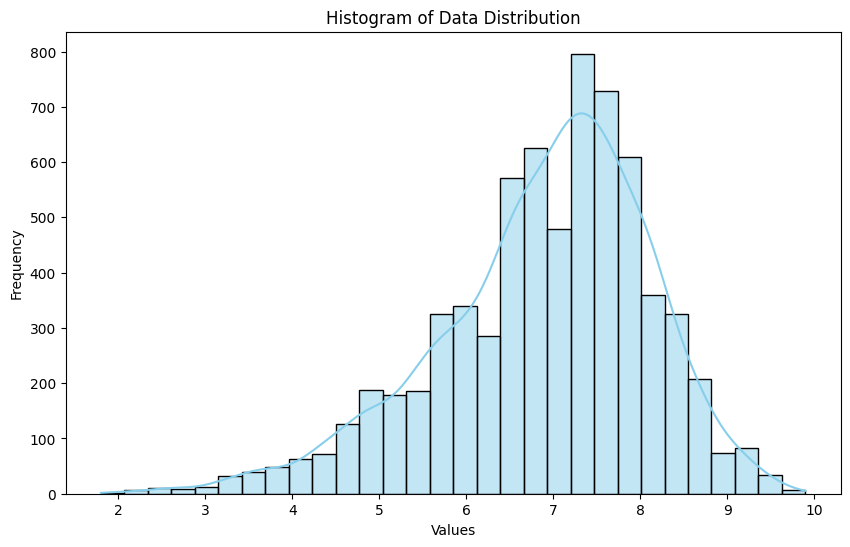

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RATING'], kde=True, color='skyblue', bins=30)
plt.title('Histogram of Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

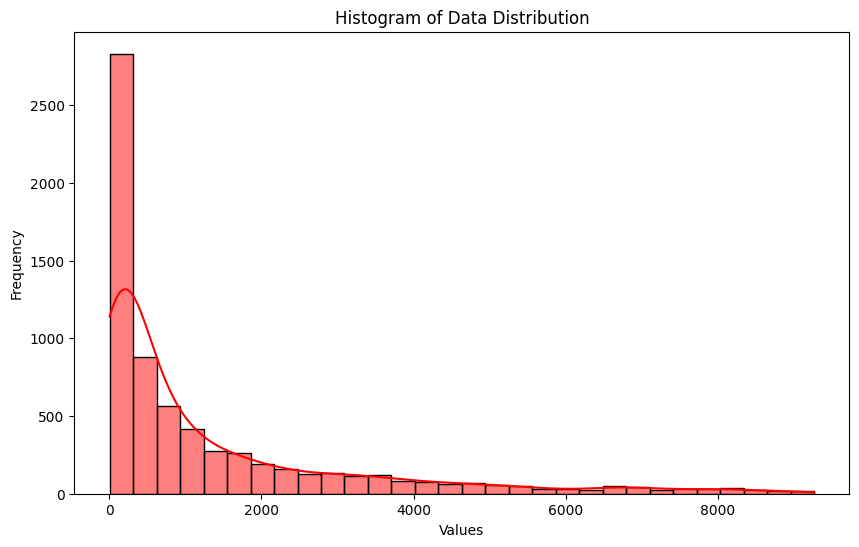

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['VOTES'], kde=True, color='red', bins=30)
plt.title('Histogram of Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

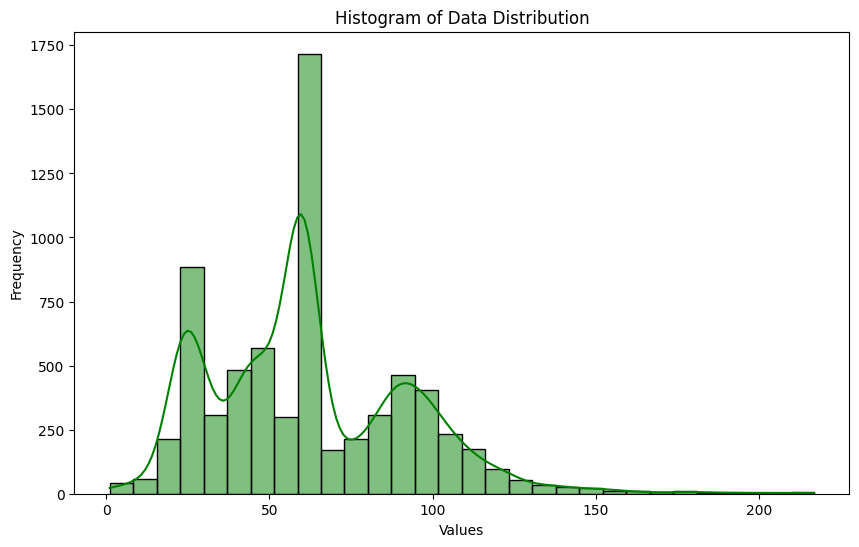

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RunTime'], kde=True, color='green', bins=30)
plt.title('Histogram of Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

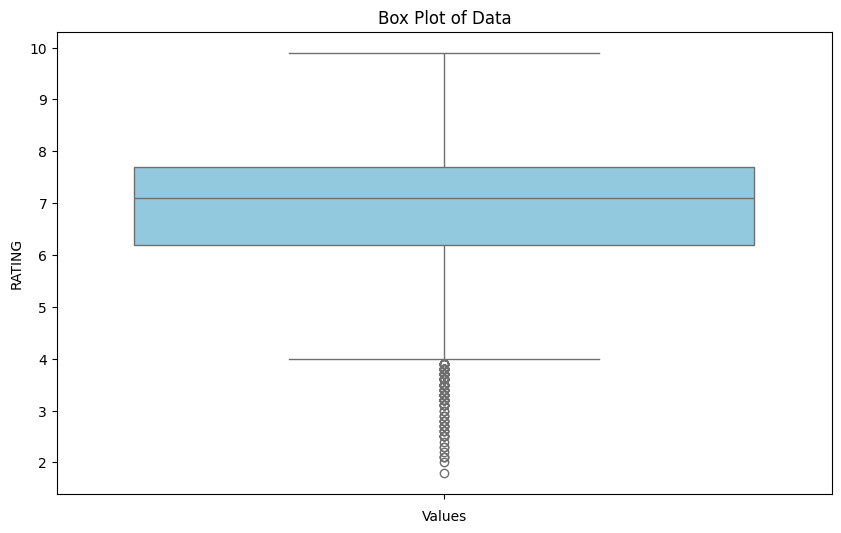

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['RATING'], color='skyblue')
plt.title('Box Plot of Data')
plt.xlabel('Values')
plt.show()

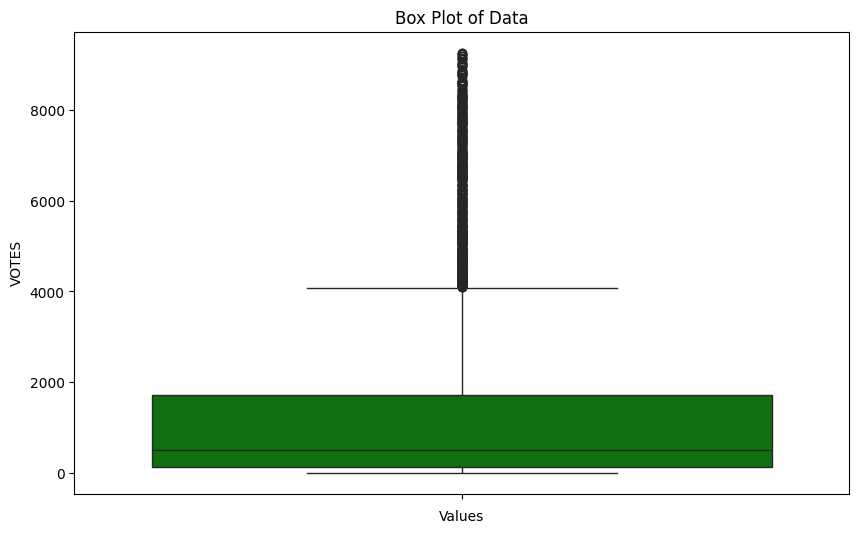

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['VOTES'], color='green')
plt.title('Box Plot of Data')
plt.xlabel('Values')
plt.show()

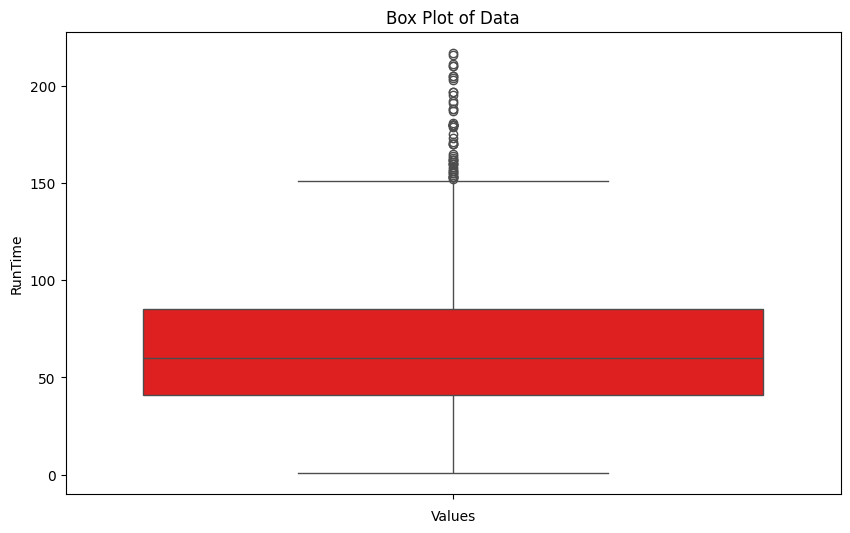

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['RunTime'], color='red')
plt.title('Box Plot of Data')
plt.xlabel('Values')
plt.show()

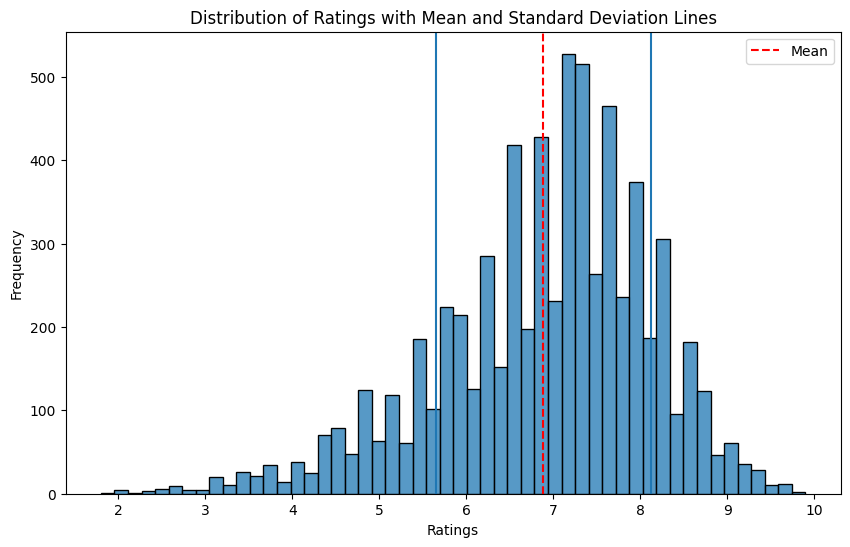

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RATING'])
plt.axvline(df['RATING'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['RATING'].mean() + df['RATING'].std())
plt.axvline(df['RATING'].mean() - df['RATING'].std())
plt.legend()
plt.title('Distribution of Ratings with Mean and Standard Deviation Lines')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

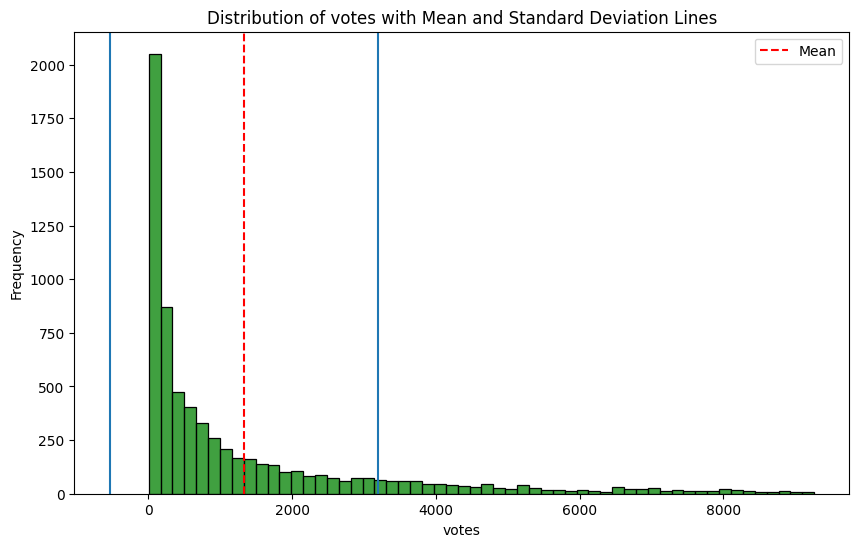

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(df['VOTES'],color='green')
plt.axvline(df['VOTES'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['VOTES'].mean() + df['VOTES'].std())
plt.axvline(df['VOTES'].mean() - df['VOTES'].std())
plt.legend()
plt.title('Distribution of votes with Mean and Standard Deviation Lines')
plt.xlabel('votes')
plt.ylabel('Frequency')
plt.show()

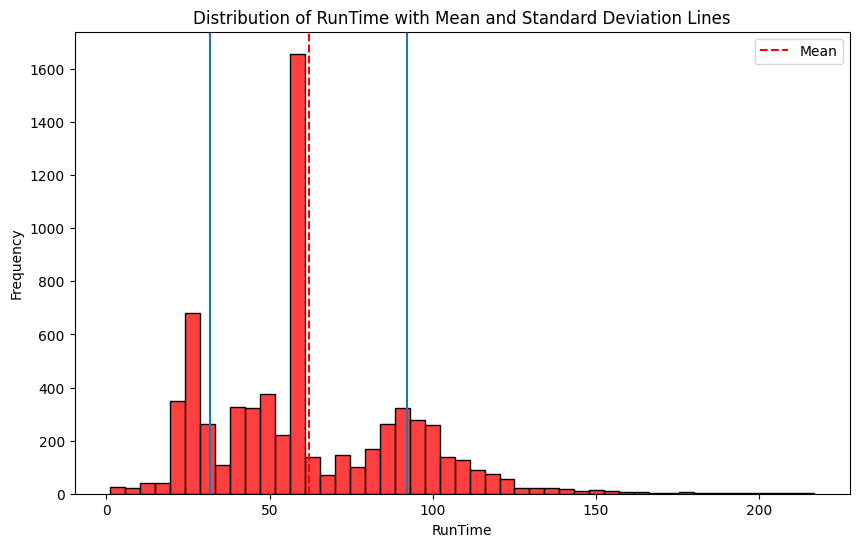

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RunTime'],color='red')
plt.axvline(df['RunTime'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['RunTime'].mean() + df['RunTime'].std())
plt.axvline(df['RunTime'].mean() - df['RunTime'].std())
plt.legend()
plt.title('Distribution of RunTime with Mean and Standard Deviation Lines')
plt.xlabel('RunTime')
plt.ylabel('Frequency')
plt.show()

## Exploratory Data Analysis

In [50]:
# 1. Understanding the Structure of the Data
print(df.head())
print(df.info())

                             MOVIES    YEAR                      GENRE  \
6   the last letter from your lover  (2021)           [drama, romance]   
25                        chernobyl  (2021)  [drama, history, romance]   
63            le dernier mercenaire  (2021)           [action, comedy]   
64                   resort to love  (2021)          [comedy, romance]   
73           a classic horror story  (2021)   [drama, horror, mystery]   

    RATING                                           ONE-LINE  \
6     6.80  a pair of interwoven stories set in the past a...   
25    5.00  a story about a heroic fireman who worked as o...   
63    5.40  a mysterious former secret service agent must ...   
64    5.70  erica who ends up as the entertainment at her ...   
73    5.70  in this gruesome suspense film strangers trave...   

                                                STARS   VOTES  RunTime Gross  
6   director augustine frizzell stars shailene woo... 5283.00   110.00   NaN  
25  di

In [51]:
# 2. Summary Statistics
df.describe()

,RATING,VOTES,RunTime
count,6825.00,6825.00,6825.00
mean,6.89,1330.25,61.97
std,1.23,1869.03,30.29
min,1.80,5.00,1.00
25%,6.20,127.00,41.00
50%,7.10,504.00,60.00
75%,7.70,1711.00,85.00
max,9.90,9263.00,217.00


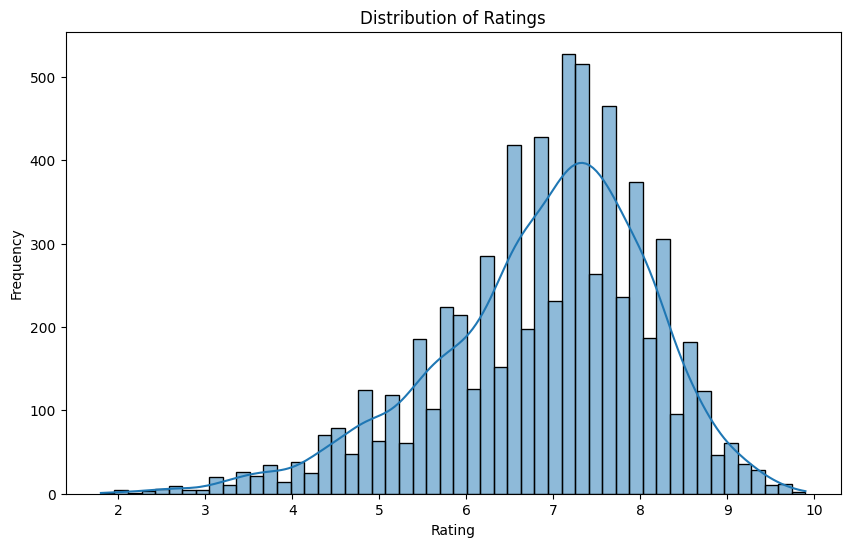

In [52]:
# 3. Visualizing the Data
# Histogram of 'RATING'
plt.figure(figsize=(10, 6))
sns.histplot(df['RATING'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

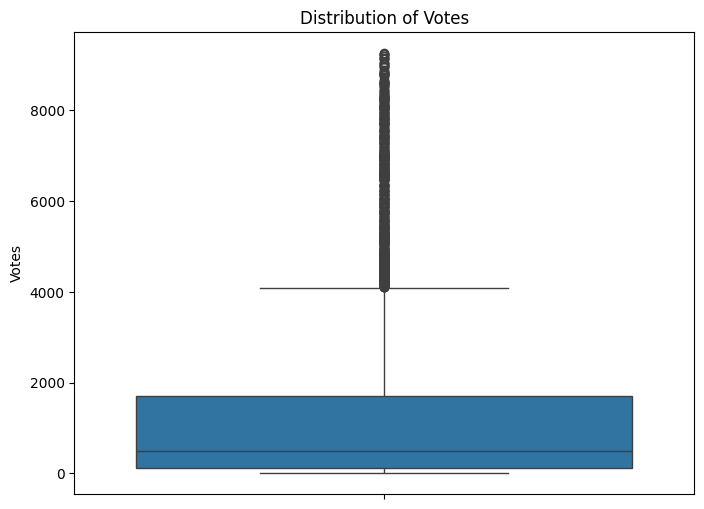

In [53]:
# 4. Outlier Detection
# Box plot of 'VOTES'
plt.figure(figsize=(8, 6))
sns.boxplot(y='VOTES', data=df)
plt.title('Distribution of Votes')
plt.ylabel('Votes')
plt.show()

In [54]:
# 5. Feature Selection
# Selecting relevant features based on domain knowledge
selected_features = ['MOVIES', 'GENRE', 'RATING', 'STARS', 'VOTES', 'RunTime']
df_selected = df[selected_features]

In [55]:
# 6. Dropping Columns
# Dropping irrelevant columns
df = df.drop(columns=['Gross','YEAR'])

In [56]:
# Feature Engineering: Creating a new feature 'Popularity' by multiplying 'VOTES' with 'RATING'
from sklearn.preprocessing import MinMaxScaler

df['Popularity'] = df['VOTES'] * df['RATING']

df['patience'] = df['RunTime'] * df['RATING']

df['likeliness'] = df['RunTime'] * df['VOTES']

scaler = MinMaxScaler(feature_range=(0, 100))
popularity_values = df['Popularity'].values.reshape(-1, 1)
df['Popularity_Scaled'] = scaler.fit_transform(popularity_values)
df.drop(columns=['Popularity'], inplace=True)

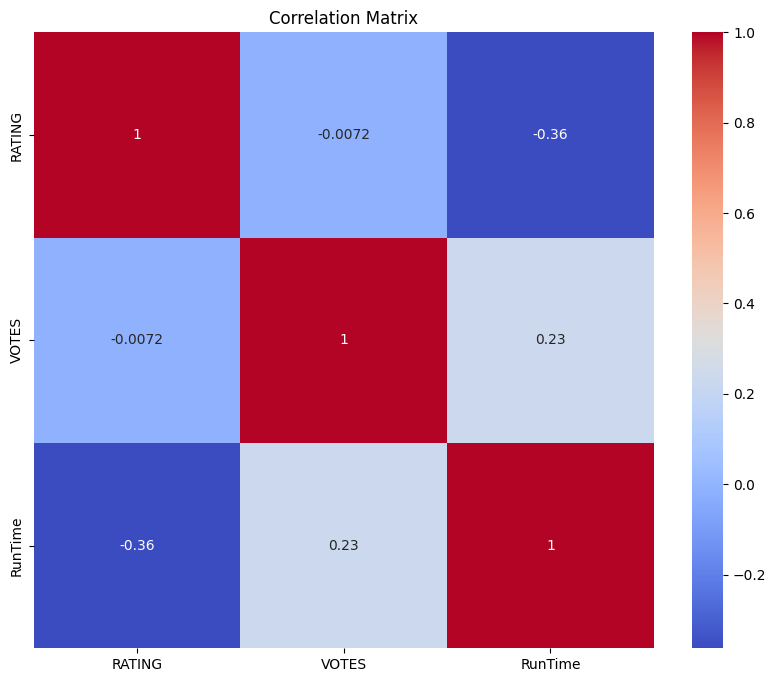

In [58]:
# 8. Correlation Analysis
df_selected['GENRE'] = df_selected['GENRE'].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else str(x))
numeric_cols = df_selected.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_selected[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [59]:
# 10. Hypothesis Testing
# Example: T-test to compare Ratings between movies with different genres
import pandas as pd
from scipy.stats import ttest_ind

action_movies = df[df['GENRE'].apply(lambda x: 'action' in x)]['RATING']
comedy_movies = df[df['GENRE'].apply(lambda x: 'comedy' in x)]['RATING']

# Perform t-test
t_stat, p_value = ttest_ind(action_movies.dropna(), comedy_movies.dropna())
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 8.742446957075835, p-value: 3.483814913571565e-18


In [60]:
action_movies = df[df['GENRE'].apply(lambda x: 'drama' in x)]['RATING']
comedy_movies = df[df['GENRE'].apply(lambda x: 'romance' in x)]['RATING']

# Perform t-test
t_stat, p_value = ttest_ind(action_movies.dropna(), comedy_movies.dropna())
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 5.138546008020405, p-value: 2.927152421625312e-07


In [61]:
action_movies = df[df['GENRE'].apply(lambda x: 'drama' in x)]['RATING']
comedy_movies = df[df['GENRE'].apply(lambda x: 'action' in x)]['RATING']

# Perform t-test
t_stat, p_value = ttest_ind(action_movies.dropna(), comedy_movies.dropna())
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: -2.9116124716892644, p-value: 0.0036146969927706015


In [62]:
action_movies = df[df['GENRE'].apply(lambda x: 'action' in x)]['RATING']
comedy_movies = df[df['GENRE'].apply(lambda x: 'history' in x)]['RATING']
# Perform t-test
t_stat, p_value = ttest_ind(action_movies.dropna(), comedy_movies.dropna())
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: -1.457541615672709, p-value: 0.14515584890841987


In [63]:
action_movies = df[df['GENRE'].apply(lambda x: 'comedy' in x)]['RATING']
comedy_movies = df[df['GENRE'].apply(lambda x: 'history' in x)]['RATING']

# Perform t-test
t_stat, p_value = ttest_ind(action_movies.dropna(), comedy_movies.dropna())
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: -5.829800285800105, p-value: 6.354926918001072e-09


In [64]:
action_movies = df[df['GENRE'].apply(lambda x: 'drama' in x)]['RATING']
comedy_movies = df[df['GENRE'].apply(lambda x: 'history' in x)]['RATING']

# Perform t-test
t_stat, p_value = ttest_ind(action_movies.dropna(), comedy_movies.dropna())
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: -3.127213636492287, p-value: 0.0017820533051623915
